图表已保存为 experimental_results3.pdf


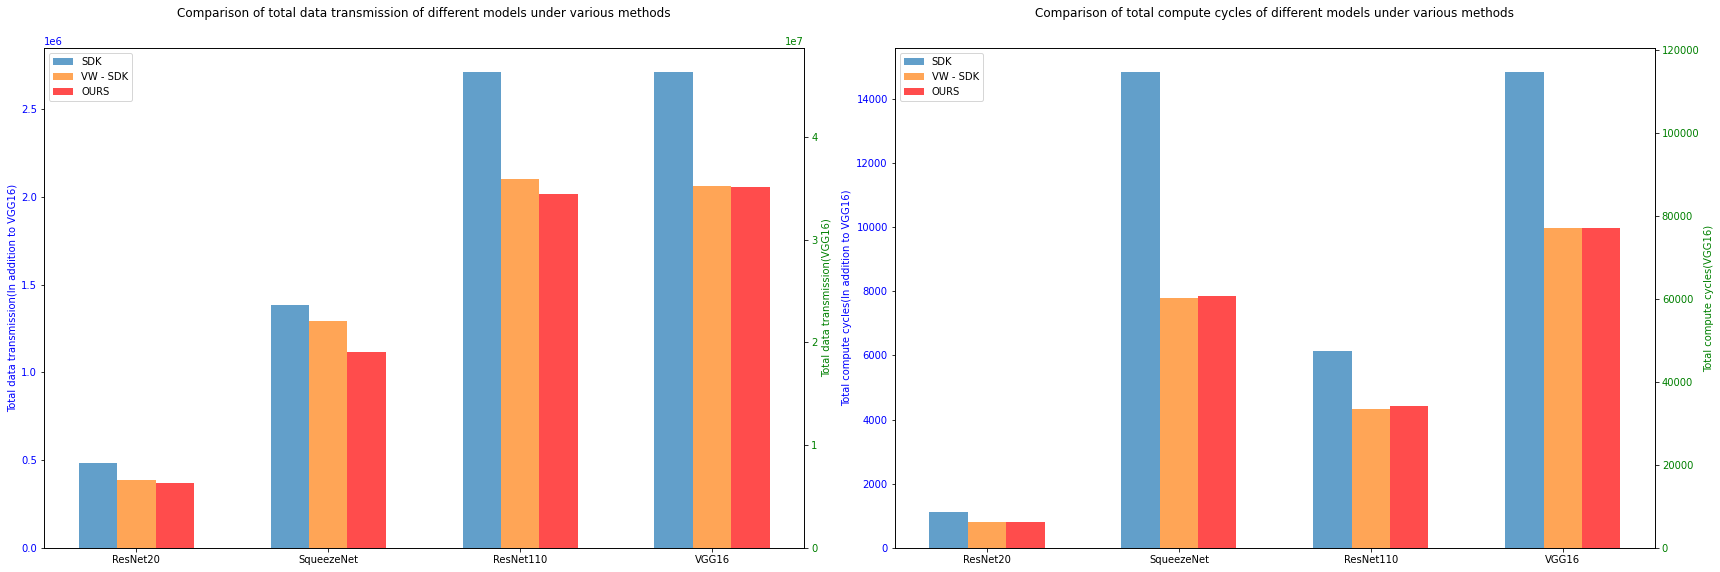

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# 原始数据，去掉 Im2col
# data1 = {
#     'Model': ['ResNet20', 'SqueezeNet', 'ResNet110', 'VGG16'],
#     'SDK': [481900, 1381648, 2711020, 46322224],
#     'VW - SDK': [384488, 1294576, 2100968, 35187024],
#     'OURS': [356528, 1088320, 1923248, 32972352]
# }
data1 = {
    'Model': ['ResNet20', 'SqueezeNet', 'ResNet110', 'VGG16'],
    'SDK': [481900, 1381648, 2711084, 46322224],
    'VW - SDK': [384488, 1294576, 2101032, 35187024],
    'OURS': [369968, 1116832, 2017392, 35075136]
}

# 新数据，去掉 Im2col
data2 = {
    'Model': ['ResNet20', 'SqueezeNet', 'ResNet110', 'VGG16'],
    'SDK': [1120, 14843, 6130, 114697],
    'VW - SDK': [804, 7802, 4345, 77102],
    'OURS': [814, 7840, 4415, 77102]
}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

# 设置图片清晰度
plt.rcParams['figure.dpi'] = 300

# 创建一个包含两个子图的画布
fig, axes = plt.subplots(1, 2, figsize=(24, 8))

# 第一个子图：原始数据
ax1 = axes[0]
# 绘制除VGG16外其他模型的柱状图
df1_except_vgg16 = df1[df1['Model'] != 'VGG16']
bar_width = 0.2
index = range(len(df1_except_vgg16))
for i, col in enumerate(df1_except_vgg16.columns[1:]):
    if col == 'OURS':
        ax1.bar([pos + i * bar_width for pos in index], df1_except_vgg16[col], width=bar_width,
                label=col, color='red', alpha=0.7)
    else:
        ax1.bar([pos + i * bar_width for pos in index], df1_except_vgg16[col], width=bar_width,
                label=col, alpha=0.7)

# 设置主坐标轴标签等
ax1.set_ylabel('Total data transmission(In addition to VGG16)', color='blue')
# 设置标题并指定y参数确保对齐
ax1.set_title('Comparison of total data transmission of different models under various methods', y=1.05)
# 调整 x 轴刻度位置，包含 VGG16 的位置
x_ticks_pos = [pos + bar_width * (len(df1.columns) - 2) / 2 for pos in index] + [len(df1_except_vgg16) + bar_width * (len(df1.columns) - 2) / 2]
# 调整 x 轴刻度标签，包含 VGG16
x_tick_labels = list(df1_except_vgg16['Model']) + ['VGG16']
ax1.set_xticks(x_ticks_pos)
ax1.set_xticklabels(x_tick_labels)
ax1.tick_params(axis='y', labelcolor='blue')

# 创建副坐标轴
ax1_secondary = ax1.twinx()
# 绘制VGG16的柱状图
vgg16_data1 = df1[df1['Model'] == 'VGG16'].set_index('Model')
for i, col in enumerate(vgg16_data1.columns):
    if col == 'OURS':
        ax1_secondary.bar([len(df1_except_vgg16) + i * bar_width], vgg16_data1[col].values[0], width=bar_width,
                          color='red', alpha=0.7)
    else:
        ax1_secondary.bar([len(df1_except_vgg16) + i * bar_width], vgg16_data1[col].values[0], width=bar_width,
                          alpha=0.7)

# 设置副坐标轴标签等
ax1_secondary.set_ylabel('Total data transmission(VGG16)', color='green')
ax1_secondary.tick_params(axis='y', labelcolor='green')

# 添加图例（保持原位置）
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax1_secondary.get_legend_handles_labels()
ax1_secondary.legend(lines + lines2, labels + labels2, loc='upper left')

# 第二个子图：新数据
ax2 = axes[1]
# 绘制除VGG16外其他模型的柱状图
df2_except_vgg16 = df2[df2['Model'] != 'VGG16']
bar_width = 0.2
index = range(len(df2_except_vgg16))
for i, col in enumerate(df2_except_vgg16.columns[1:]):
    if col == 'OURS':
        ax2.bar([pos + i * bar_width for pos in index], df2_except_vgg16[col], width=bar_width,
                label=col, color='red', alpha=0.7)
    else:
        ax2.bar([pos + i * bar_width for pos in index], df2_except_vgg16[col], width=bar_width,
                label=col, alpha=0.7)

# 设置主坐标轴标签等
ax2.set_ylabel('Total compute cycles(In addition to VGG16)', color='blue')
# 设置标题并指定相同的y参数确保对齐
ax2.set_title('Comparison of total compute cycles of different models under various methods', y=1.05)
# 调整 x 轴刻度位置，包含 VGG16 的位置
x_ticks_pos = [pos + bar_width * (len(df2.columns) - 2) / 2 for pos in index] + [len(df2_except_vgg16) + bar_width * (len(df2.columns) - 2) / 2]
# 调整 x 轴刻度标签，包含 VGG16
x_tick_labels = list(df2_except_vgg16['Model']) + ['VGG16']
ax2.set_xticks(x_ticks_pos)
ax2.set_xticklabels(x_tick_labels)
ax2.tick_params(axis='y', labelcolor='blue')

# 创建副坐标轴
ax2_secondary = ax2.twinx()
# 绘制VGG16的柱状图
vgg16_data2 = df2[df2['Model'] == 'VGG16'].set_index('Model')
for i, col in enumerate(vgg16_data2.columns):
    if col == 'OURS':
        ax2_secondary.bar([len(df2_except_vgg16) + i * bar_width], vgg16_data2[col].values[0], width=bar_width,
                          color='red', alpha=0.7)
    else:
        ax2_secondary.bar([len(df2_except_vgg16) + i * bar_width], vgg16_data2[col].values[0], width=bar_width,
                          alpha=0.7)

# 设置副坐标轴标签等
ax2_secondary.set_ylabel('Total compute cycles(VGG16)', color='green')
ax2_secondary.tick_params(axis='y', labelcolor='green')

# 添加图例（保持原位置）
lines, labels = ax2.get_legend_handles_labels()
lines2, labels2 = ax2_secondary.get_legend_handles_labels()
ax2_secondary.legend(lines + lines2, labels + labels2, loc='upper left')

# 调整布局避免标签重叠等问题
plt.tight_layout()

# 保存为 PDF
pdf_path = 'experimental_results3.pdf'
with PdfPages(pdf_path) as pdf:
    pdf.savefig(fig)

print(f"图表已保存为 {pdf_path}")
    

In [1]:
from noc import *
from GeneticOptimizer import *


num_chiplet = 3
num_tile = 16



mapping,net = read_net_mapping_strategy('Resnet20',512,512)
transfer_path = calculate_transferpath(mapping,net,8)
chip_map = allocate_chips(mapping,num_tile,num_chiplet)
split_data = split_transmissions(chip_map,transfer_path)
chip_layer,noc,nop = Sequential_mapping(split_data)
input_layout,all_chip = block_mapping(mapping,4)
optimized_layouts, hops_summary = optimize_all_chips(
    input_layout=input_layout,  # 显式传入布局参数
    pop_size=50,
    generations=100,
    mutation_rate=0.1
)

成功读取并处理文件:.\Resnet20\NetWork_Resnet20_512_512_cof.csv,共20行
文件夹已存在：d:\nudt_edu\master_code\to_Interconnect
文件夹已存在：./to_Interconnect\chiplet_perlayer_resource

=== 芯片0优化过程 ===
优化前跳数总和：50
优化完成 | 最小跳数总和：38 | 跳数减少：12

=== 芯片1优化过程 ===
优化前跳数总和：57
优化完成 | 最小跳数总和：37 | 跳数减少：20

=== 芯片2优化过程 ===
优化前跳数总和：6
优化完成 | 最小跳数总和：4 | 跳数减少：2


In [2]:
full_result = GA_mapping(optimized_layouts, split_data)

In [3]:
full_result

{'intra_records': {0: [[[14], [10, 15], 24576],
   [[10, 15], [7, 11], 131072],
   [[7, 11], [3, 6], 131072],
   [[3, 6], [2, 5], 131072],
   [[2, 5], [1, 4], 131072],
   [[1, 4], [0, 9], 131072],
   [[0, 9], [8], 131072],
   [[8], [12, 13], 131072]],
  1: [[[1, 4], [0, 5], 65536],
   [[0, 5], [2, 6], 65536],
   [[2, 6], [3, 7], 65536],
   [[3, 7], [11], 65536],
   [[11], [10, 15], 65536],
   [[10, 15], [9, 14], 32768],
   [[9, 14], [8, 13], 32768],
   [[8, 13], [12], 32768]],
  2: [[[2], [3, 6], 16384.0], [[3, 6], [7], 32768]]},
 'inter_records': [[[0], [1], 65536.0], [[1], [2], 49152.0]]}

In [5]:
split_data

{0: {'intra': [(1, 2, [24576, 1, 2]),
   (2, 3, [131072, 2, 2]),
   (3, 4, [131072, 2, 2]),
   (4, 5, [131072, 2, 2]),
   (5, 6, [131072, 2, 2]),
   (6, 7, [131072, 2, 2]),
   (7, 8, [131072, 2, 1]),
   (8, 9, [131072, 1, 2])],
  'inter': [(9, 10, 1, [65536, 2, 2])]},
 1: {'intra': [(10, 11, [65536, 2, 2]),
   (11, 12, [65536, 2, 2]),
   (12, 13, [65536, 2, 2]),
   (13, 14, [65536, 2, 1]),
   (14, 15, [65536, 1, 2]),
   (15, 16, [32768, 2, 2]),
   (16, 17, [32768, 2, 2]),
   (17, 18, [32768, 2, 1])],
  'inter': [(17, 18, 2, [32768, 2, 1]), (18, 19, 2, [16384.0, 1, 2])]},
 2: {'intra': [(18, 19, [16384.0, 1, 2]), (19, 20, [32768, 2, 1])],
  'inter': []}}

In [4]:
def create_folder(folder_name, path=None):
    """
    在指定路径创建文件夹并进入，若文件夹已存在则直接进入
    
    参数:
        folder_name (str): 要创建的文件夹名称
        path (str, optional): 文件夹所在的路径，默认为当前路径
    
    返回:
        str: 最终进入的文件夹的绝对路径
        None: 若操作失败
    """
    try:
        # 确定目标路径
        if path is None:
            target_path = os.path.join(os.getcwd(), folder_name)
        else:
            # 检查指定路径是否存在
            if not os.path.exists(path):
                print(f"错误：指定路径不存在 - {path}")
                return None
            target_path = os.path.join(path, folder_name)
        
        # 检查文件夹是否存在
        if not os.path.exists(target_path):
            # 创建文件夹
            os.makedirs(target_path, exist_ok=True)  # exist_ok=True 避免多线程等场景的竞争问题
            print(f"已创建文件夹：{target_path}")
        else:
            print(f"文件夹已存在：{target_path}")
        
        
        return os.getcwd()
    
    except PermissionError:
        print(f"error: no permission - {folder_name}")
        return None
    except Exception as e:
        print(f"operation error: {str(e)}")
        return None


In [5]:
import os
from typing import List, Dict
import glob
import re
import subprocess

def process_network_traces(
    network_name: str,
    mapping_mode: str,  # "Ours", "Sqm", or "GA"
    measurement_method: str,  # "NoC" or "NoP"
    mesh: int
) -> Dict[str, List[str]]:
    """
    处理网络跟踪数据的函数
    
    参数:
        network_name: 网络名称字符串
        mapping_mode: 映射模式 ("Ours", "Sqm", "GA")
        measurement_method: 测量方法 ("NoC", "NoP")
    
    列表
    """
    # 1. 构建基础路径

    total_area = 0
    total_latency = 0
    total_power = 0
    if mapping_mode == 'Ours':

        base_path = os.path.join(
            "./",  
            f"{network_name}_{measurement_method}_traces"
        )

    elif mapping_mode == "GA":

        base_path = os.path.join(
            "./", 
            f"{network_name}_{measurement_method}_traces"
        )

    else:
        base_path = os.path.join(
            "./", 
            f"{network_name}_{measurement_method}_traces"
        )
    
    # 检查路径是否存在
    if not os.path.exists(base_path):
        raise FileNotFoundError(f"路径不存在: {base_path}")
    
    # 2. 获取所有子文件夹
    result = {}
    
    # 遍历base_path下的所有文件夹
    for fold_idx,folder_name in enumerate(os.listdir(base_path)):
        folder_path = os.path.join(base_path, folder_name)
        
            
        # 3. 遍历文件夹中的所有txt文件
        files = glob.glob(folder_path+'/*txt')
        print(files)

        for file_idx,file in enumerate(files):

            fp = open('mesh_config_trace_based', 'r')
           
            config_file = base_path+'/logs/chiplet_' + str(fold_idx) + '_mesh_config'
            outfile = open(config_file, 'w')
            for line in fp:
                line = line.strip()

                matchobj = re.match(r'^k=', line)

                if matchobj:
                    line = 'k=' + str(mesh) + ';'

                outfile.write(line + '\n')

            fp.close()
            outfile.close()

            # print(file)
            create_folder('logs',base_path)

            log_file = base_path + '/logs/' + folder_name + '_layer_' + str(file_idx) + '.log'

            os.system('cp ' + file + ' ' + base_path + '/trace_file.txt')

            booksim_command = '/home/zxf1/master_code/Interconnect/booksim ' + config_file + ' > ' + log_file

            os.system(booksim_command)
            
            # print(file_idx)
            latency = os.popen('grep "Trace is finished in" ' + log_file + ' | tail -1 | awk \'{print $5}\'').read().strip()
            # print(latency)
            # print('[ INFO] Latency for Chiplet : ' + str(chiplet_idx) + ' Layer : ' + str(run_id) + ' is ' + latency +'\n')
            total_latency = total_latency + int(latency)
    
    
            power = os.popen('grep "Total Power" ' + log_file + ' | tail -1 | awk \'{print $4}\'').read().strip()
    
            # print('[ INFO] Power for Chiplet : ' + str(chiplet_idx)  + ' Layer : ' + str(run_id) + ' is ' + power +'\n')
            
            total_power = total_power + float(power)
    
    
            area = os.popen('grep "Total Area" ' + log_file + ' | tail -1 | awk \'{print $4}\'').read().strip()
    
            # print('[ INFO] Area for Chiplet : ' + str(chiplet_idx)  + ' Layer : ' + str(run_id) + ' is ' + area +'\n')
    
            total_area = total_area + float(area)

            outfile_latency = open(base_path + '/logs/booksim_latency.csv', 'a')
            outfile_latency.write(folder_name + '_layer_' + str(file_idx) + ':' + str(total_latency) + '\n')
            outfile_latency.close()

        outfile_latency = open(base_path + '/logs/booksim_latency.csv', 'a')
        outfile_latency.write('Total NoC latency is' + '\t' + str(total_latency*1e-9) + '\t' + 's' + '\n')
        outfile_latency.close()


        outfile_power = open(base_path + '/logs/booksim_area.csv', 'a')
        outfile_power.write('Total NoC power is' + '\t' + str(total_power) + '\t' + 'mW' + '\n')
        outfile_power.close()

        outfile_area = open(base_path + '/logs/booksim_area.csv', 'a')
        outfile_area.write('Total NoC area is' + '\t' + str(total_area) +  '\t' + 'um^2' + '\n')
        outfile_area.close()



# 使用示例
if __name__ == "__main__":

    # 示例调用
    data = process_network_traces(
        network_name="Resnet20",
        mapping_mode="Sqm",
        measurement_method="NoC",
        mesh=4
    )


['./Resnet20_NoC_traces/Chiplet_0/trace_file_layer_4.txt', './Resnet20_NoC_traces/Chiplet_0/trace_file_layer_7.txt', './Resnet20_NoC_traces/Chiplet_0/trace_file_layer_0.txt', './Resnet20_NoC_traces/Chiplet_0/trace_file_layer_1.txt', './Resnet20_NoC_traces/Chiplet_0/trace_file_layer_2.txt', './Resnet20_NoC_traces/Chiplet_0/trace_file_layer_5.txt', './Resnet20_NoC_traces/Chiplet_0/trace_file_layer_6.txt', './Resnet20_NoC_traces/Chiplet_0/trace_file_layer_3.txt']
文件夹已存在：./Resnet20_NoC_traces/logs
文件夹已存在：./Resnet20_NoC_traces/logs
文件夹已存在：./Resnet20_NoC_traces/logs
文件夹已存在：./Resnet20_NoC_traces/logs
文件夹已存在：./Resnet20_NoC_traces/logs
文件夹已存在：./Resnet20_NoC_traces/logs
文件夹已存在：./Resnet20_NoC_traces/logs
文件夹已存在：./Resnet20_NoC_traces/logs
['./Resnet20_NoC_traces/Chiplet_2/trace_file_layer_0.txt', './Resnet20_NoC_traces/Chiplet_2/trace_file_layer_1.txt']
文件夹已存在：./Resnet20_NoC_traces/logs
文件夹已存在：./Resnet20_NoC_traces/logs
[]
[]
['./Resnet20_NoC_traces/Chiplet_1/trace_file_layer_4.txt', './Resnet20_N

In [10]:
data

{'Chiplet_0': ['./Interconnect\\Resnet20_NoC_traces\\Chiplet_0\\trace_file_layer_0.txt',
  './Interconnect\\Resnet20_NoC_traces\\Chiplet_0\\trace_file_layer_1.txt',
  './Interconnect\\Resnet20_NoC_traces\\Chiplet_0\\trace_file_layer_2.txt',
  './Interconnect\\Resnet20_NoC_traces\\Chiplet_0\\trace_file_layer_3.txt',
  './Interconnect\\Resnet20_NoC_traces\\Chiplet_0\\trace_file_layer_4.txt',
  './Interconnect\\Resnet20_NoC_traces\\Chiplet_0\\trace_file_layer_5.txt',
  './Interconnect\\Resnet20_NoC_traces\\Chiplet_0\\trace_file_layer_6.txt',
  './Interconnect\\Resnet20_NoC_traces\\Chiplet_0\\trace_file_layer_7.txt'],
 'Chiplet_1': ['./Interconnect\\Resnet20_NoC_traces\\Chiplet_1\\trace_file_layer_0.txt',
  './Interconnect\\Resnet20_NoC_traces\\Chiplet_1\\trace_file_layer_1.txt',
  './Interconnect\\Resnet20_NoC_traces\\Chiplet_1\\trace_file_layer_2.txt',
  './Interconnect\\Resnet20_NoC_traces\\Chiplet_1\\trace_file_layer_3.txt',
  './Interconnect\\Resnet20_NoC_traces\\Chiplet_1\\trace_file